In [40]:
def to_category(x):
        if x.find('Restaurant') >= 0: return 'Restaurant'
        if x.find('Boucherie') >= 0: return 'Boucherie'
        if x.find('Boulangerie') >= 0: return 'Boulangerie'
        if x.find('Caves') >= 0: return 'Caves'
        if x.find('Chaîne') >= 0: return 'Chaîne'
        if x.find('Transformation') >= 0: return 'Transformation'
        if x.find('Production') >= 0: return 'Production'
        if x.find('Producteur') >= 0: return 'Producteur'
        if x.find('Metier') >= 0: return 'Metier'
        else: return 'Autre'

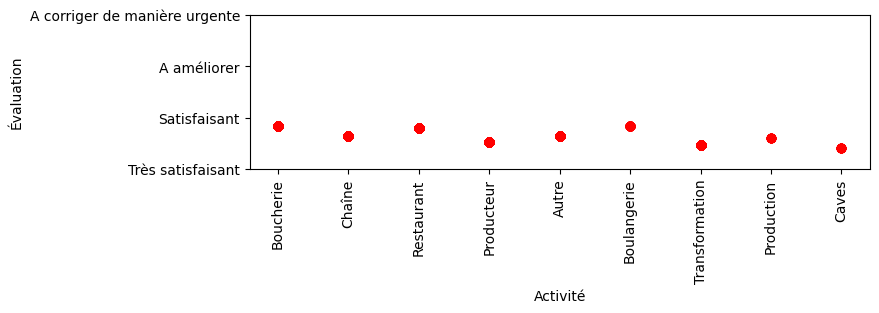

Mean Squared Error: 0.35071981691267806


In [53]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
house_data = pd.read_csv('export_alimconfiance@dgal.csv', sep=';')
#convertion des activités
house_data[analysing] = house_data[analysing].apply(to_category)

# Définir le nom des colonnes
analysed = "Synthese_eval_sanit"
analysing = "APP_Libelle_activite_etablissement"

def eval_to_numeric(x):
    if x == 'Très satisfaisant':
        return 1
    if x == 'Satisfaisant':
        return 2
    if x == 'A améliorer':
        return 3
    if x == 'A corriger de manière urgente':
        return 4

house_data[analysed] = house_data[analysed].apply(eval_to_numeric)

# Décomposition du dataset
X = pd.get_dummies(house_data[analysing])
y = house_data[analysed]

# Création du modèle Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Division des données en ensembles d'entraînement et de test en conservant la distribution des évaluations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraînement du modèle
random_forest.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Affichage du résultat avec une figure plus large
plt.figure(figsize=(8, 2))

plt.xlabel('Activité')
plt.ylabel('Évaluation')

# Vous pouvez conserver la valeur textuelle de l'activité ici
plt.scatter(house_data.loc[y_test.index, analysing], y_pred, c='r', marker='o', alpha=0.5)

# Pour faire pivoter les étiquettes de l'axe x
plt.xticks(rotation=90)

# Définir les étiquettes d'axe personnalisées pour l'axe Y
plt.yticks([1, 2, 3, 4], ['Très satisfaisant', 'Satisfaisant', 'A améliorer', 'A corriger de manière urgente'])

plt.show()

# Calcul de la MSE pour évaluer la performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)